<a href="https://colab.research.google.com/github/YashasaveeKesarwani99/Machine-Learning-Algo/blob/main/neuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Basic Neural Network**

In [1]:
%tensorflow_version 2.x

#Tensorflow and tf.keras
import tensorflow as tf
from tensorflow import keras

#Helper libraries
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Dataset

fashion_mnist = keras.datasets.fashion_mnist # load dataset

(train_images, train_labels),(test_images,test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [3]:
train_images.shape

(60000, 28, 28)

In [4]:
train_images[0,23,23]

194

Our pixel values are between 0 and 255, 0 being black and 255 being white. This means we have a grayscale image as there are no channels

In [5]:
train_labels[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

Our labels are integers ranging from 0-9. Each integer represents a specific article of clothing. We'll create an array of labels names to which is which

In [7]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

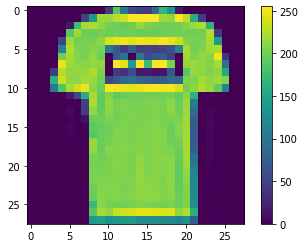

In [8]:
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

Data Preprocessing

In [9]:
# scaling pixels between 0 and 1

train_images = train_images/ 255.0

test_images = test_images/ 255.0

Building the model

In [13]:
model = keras.Sequential([
      keras.layers.Flatten(input_shape=(28,28)), #input layer
      keras.layers.Dense(128, activation='relu'), #hidden layer
      keras.layers.Dense(10, activation='softmax') #output layer
])

In [14]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics = ['accuracy']
              )

In [15]:
# Training the model

model.fit(train_images,train_labels,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6342 - accuracy: 0.7835
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3850 - accuracy: 0.8628
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3439 - accuracy: 0.8739
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3152 - accuracy: 0.8831
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2999 - accuracy: 0.8902
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2819 - accuracy: 0.8944
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2758 - accuracy: 0.8967
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2545 - accuracy: 0.9044
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2436 - accuracy: 0.9095
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.234

In [17]:
# Evaluating the Model

test_loss, test_arc = model.evaluate(test_images,test_labels,verbose=1)
print('Test accuracy:', test_arc)

313/313 [==============================] - 0s 1ms/step - loss: 0.3595 - accuracy: 0.8722
Test accuracy: 0.8722000122070312


Accuracy was less than the training data because of the obvious reason of overfitting